In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [2]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Flatten, Layer
from tensorflow.keras.models import Sequential
from tensorflow.keras.losses import mean_squared_error
from tensorflow.keras import backend as K

class RBFLayer(Layer):
    def __init__(self, units, gamma, **kwargs):
        super(RBFLayer, self).__init__(**kwargs)
        self.units = units
        self.gamma = gamma

    def build(self, input_shape):
        # Create a trainable weight variable for the centers of the RBFs
        self.centers = self.add_weight(name='centers',
                                      shape=(self.units, input_shape[-1]),
                                      initializer='uniform',
                                      trainable=True)
        super(RBFLayer, self).build(input_shape)

    def call(self, inputs):
        # Calculate the radial basis functions for each input sample and each RBF center
        diff = K.expand_dims(inputs) - self.centers  # shape: (batch_size, units, input_dim)
        norm = K.sum(K.square(diff), axis=-1)  # shape: (batch_size, units)
        rbf = K.exp(-self.gamma * norm)  # shape: (batch_size, units)

        return rbf

    def compute_output_shape(self, input_shape):
        return input_shape[0], self.units

In [3]:
# load Pivot data
url = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/LB.csv'
df = pd.read_csv(url, delimiter=';')
# Menentukan input and output
X = df.drop(columns=["GOAL","7MSHOT","9MSHOT","6MSHOT","WINGSHOT","PIVOTSHOT","FASTBREAKSHOT"])
y = df.GOAL
# Membagi data set 80 : 20 train dan test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Merancang Neural Network Model
model = Sequential()
model.add(Flatten(input_shape=(6,)))  
model.add(RBFLayer(6, 0.5))
model.add(Dense(1, activation='linear'))  
model.compile(optimizer='RMSprop', loss=mean_squared_error)  
# Melatih arsitektur model terhadap dataset
model.fit(X_train, y_train, batch_size=8, epochs=100)
# Melakukan prediksi nilai
pred_train = model.predict(X_train)
pred_test = model.predict(X_test)

Epoch 1/100
151/151 [==============================] - 1s 1ms/step - loss: 16.3257
Epoch 2/100
151/151 [==============================] - 0s 1ms/step - loss: 10.0736
Epoch 3/100
151/151 [==============================] - 0s 1ms/step - loss: 6.5834
Epoch 4/100
151/151 [==============================] - 0s 1ms/step - loss: 5.0364
Epoch 5/100
151/151 [==============================] - 0s 997us/step - loss: 4.3476
Epoch 6/100
151/151 [==============================] - 0s 1ms/step - loss: 3.9203
Epoch 7/100
151/151 [==============================] - 0s 1ms/step - loss: 3.6260
Epoch 8/100
151/151 [==============================] - 0s 1ms/step - loss: 3.4187
Epoch 9/100
151/151 [==============================] - 0s 924us/step - loss: 3.2553
Epoch 10/100
151/151 [==============================] - 0s 924us/step - loss: 3.0998
Epoch 11/100
151/151 [==============================] - 0s 1ms/step - loss: 2.9625
Epoch 12/100
151/151 [==============================] - 0s 954us/step - loss: 2.8384
Epo

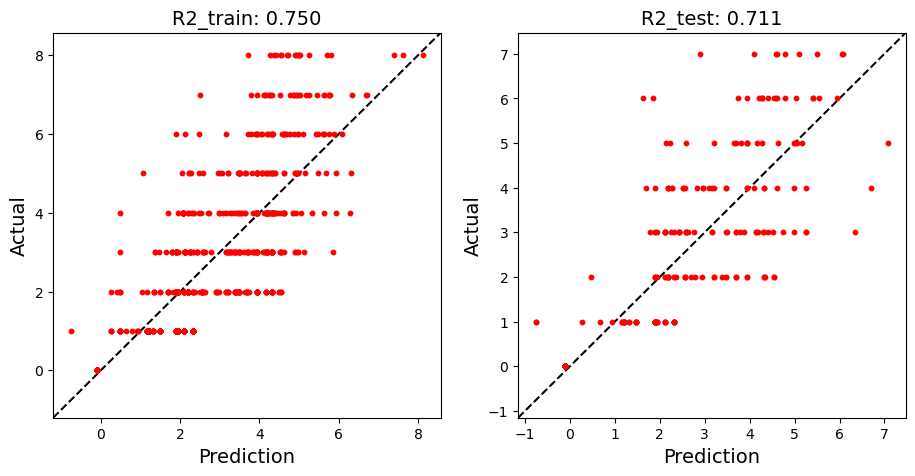

Mean Squared Error (MSE) 1.345121091297079
Mean Absolute Error (MAE) 0.7741746677468154


In [4]:
    from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

    # evaluation
    plt.figure(figsize=(11, 5))

    plt.subplot(121)
    plt.scatter(pred_train, y_train, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_train: {r2_score(y_train, pred_train):.3f}", fontsize=14)
    

    plt.subplot(122)
    plt.scatter(pred_test, y_test, c='r', s=10)
    x1, x2 = plt.xlim()
    y1, y2 = plt.ylim()
    lim = min(x1, y1), min(x2, y2)
    plt.xlim(*lim)
    plt.ylim(*lim)
    plt.plot(lim, lim, 'k--', zorder=-1)
    plt.xlabel("Prediction", fontsize=14)
    plt.ylabel("Actual", fontsize=14)
    plt.title(f"R2_test: {r2_score(y_test, pred_test):.3f}", fontsize=14)
    
    plt.show()
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, pred_test)

    # Calculate Mean Absolute Error (MAE)
    mae = mean_absolute_error(y_test, pred_test)
    print(f"Mean Squared Error (MSE)",mse)
    print(f"Mean Absolute Error (MAE)",mae) 
   


In [5]:
X

,7MACC,6MACC,9MACC,WINGACC,PIVOTACC,FASTBREAKACC
0,0.0,0.5,0.50,0,0.0,0.0
1,0.0,0.0,0.33,0,0.0,0.0
2,0.0,0.0,0.00,0,0.0,1.0
3,0.0,1.0,0.00,0,0.0,0.0
4,0.0,0.0,0.00,0,0.0,0.0
...,...,...,...,...,...,...
1503,0.0,0.0,0.00,0,0.0,1.0
1504,0.0,0.0,1.00,0,0.0,0.0
1505,0.0,0.0,0.00,0,1.0,0.0
1506,0.0,0.0,0.50,0,0.0,0.0


In [6]:
urlacc = 'https://raw.githubusercontent.com/ravsssh/HandballPrediction/main/Handball%20Prediction/data/Sensitivity/ACC.csv'
acc_df = pd.read_csv(urlacc, delimiter = ';')
acc_sensitivity = model.predict(acc_df)
print(acc_sensitivity)

3/3 [==============================] - 0s 1ms/step
[[-0.02965999]
 [ 0.15663981]
 [ 0.41461694]
 [ 0.74455416]
 [ 1.1315458 ]
 [ 1.5430061 ]
 [ 1.9311544 ]
 [ 2.241243  ]
 [ 2.423947  ]
 [ 2.4481604 ]
 [ 2.309655  ]
 [-0.02965999]
 [ 0.40725553]
 [ 0.826481  ]
 [ 1.19003   ]
 [ 1.4786702 ]
 [ 1.6901014 ]
 [ 1.833699  ]
 [ 1.9244298 ]
 [ 1.9778905 ]
 [ 2.007318  ]
 [ 2.022471  ]
 [-0.02965999]
 [ 0.5226294 ]
 [ 1.035838  ]
 [ 1.4688598 ]
 [ 1.8042681 ]
 [ 2.044368  ]
 [ 2.2039084 ]
 [ 2.3026104 ]
 [ 2.3595881 ]
 [ 2.3903291 ]
 [ 2.4058495 ]
 [-0.02965999]
 [ 0.18827939]
 [ 0.33747423]
 [ 0.39305818]
 [ 0.34537446]
 [ 0.20271993]
 [-0.01101637]
 [-0.26289058]
 [-0.5191655 ]
 [-0.7524638 ]
 [-0.9458289 ]
 [-0.02965999]
 [ 0.12354422]
 [ 0.31761897]
 [ 0.5428513 ]
 [ 0.7793654 ]
 [ 0.9989319 ]
 [ 1.1700485 ]
 [ 1.265215  ]
 [ 1.2681484 ]
 [ 1.1783364 ]
 [ 1.0111831 ]
 [-0.02965999]
 [ 0.1664815 ]
 [ 0.42296028]
 [ 0.73123205]
 [ 1.0683911 ]
 [ 1.3979768 ]
 [ 1.6755092 ]
 [ 1.8580124 ]
 [ 1

In [7]:
pd.DataFrame(acc_sensitivity).to_csv('sensitivitasaccuracy.csv', index=False)